In [1]:

import numpy as np 
import pandas as pd 

In [2]:
import pandas as pd

train_file_path = 'train_motion_data.csv'
test_file_path = 'test_motion_data.csv'

train_data = pd.read_csv(train_file_path)
test_data = pd.read_csv(test_file_path)
train_data['dataset'] = 'train'
test_data['dataset'] = 'test'

In [3]:
combined_data = pd.concat([train_data, test_data], ignore_index=True)
print("Combined Data Shape:", combined_data.shape)
print(combined_data.head())

Combined Data Shape: (6728, 9)
       AccX      AccY      AccZ     GyroX     GyroY     GyroZ   Class  \
0  0.000000  0.000000  0.000000  0.059407 -0.174707  0.101938  NORMAL   
1 -1.624864 -1.082492 -0.204183 -0.028558  0.051313  0.135536  NORMAL   
2 -0.594660 -0.122410  0.220502 -0.019395 -0.029322  0.087888  NORMAL   
3  0.738478 -0.228456  0.667732  0.069791 -0.029932  0.054902  NORMAL   
4  0.101741  0.777568 -0.066730  0.030696 -0.003665  0.054902  NORMAL   

   Timestamp dataset  
0    3581629   train  
1    3581630   train  
2    3581630   train  
3    3581631   train  
4    3581631   train  


In [4]:
print(combined_data.info())

print(combined_data.isnull().sum())
print(combined_data.describe())
print(combined_data['dataset'].value_counts())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6728 entries, 0 to 6727
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   AccX       6728 non-null   float64
 1   AccY       6728 non-null   float64
 2   AccZ       6728 non-null   float64
 3   GyroX      6728 non-null   float64
 4   GyroY      6728 non-null   float64
 5   GyroZ      6728 non-null   float64
 6   Class      6728 non-null   object 
 7   Timestamp  6728 non-null   int64  
 8   dataset    6728 non-null   object 
dtypes: float64(6), int64(1), object(2)
memory usage: 473.2+ KB
None
AccX         0
AccY         0
AccZ         0
GyroX        0
GyroY        0
GyroZ        0
Class        0
Timestamp    0
dataset      0
dtype: int64
              AccX         AccY         AccZ        GyroX        GyroY  \
count  6728.000000  6728.000000  6728.000000  6728.000000  6728.000000   
mean      0.070613    -0.100175     0.025112     0.002326    -0.000024   
std       0.978

Class Distribution:
Class
SLOW          2604
NORMAL        2197
AGGRESSIVE    1927
Name: count, dtype: int64


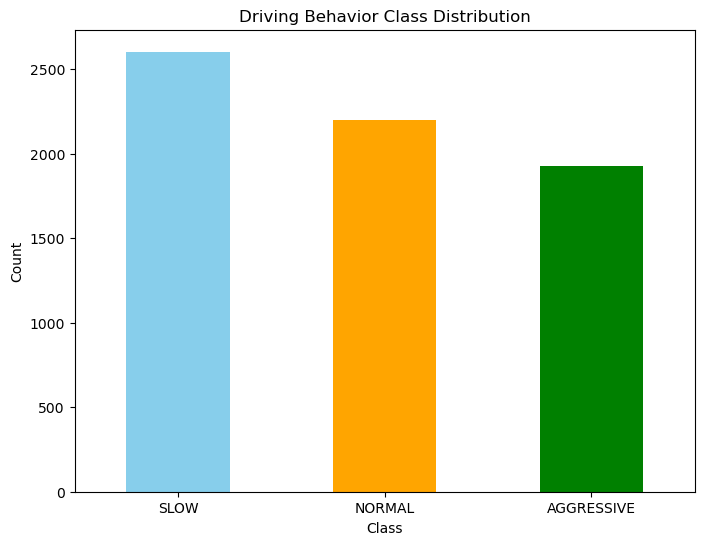

In [5]:
import matplotlib.pyplot as plt

# Class distribution
class_counts = combined_data['Class'].value_counts()

# Display counts
print("Class Distribution:")
print(class_counts)

# Plot the distribution
plt.figure(figsize=(8, 6))
class_counts.plot(kind='bar', color=['skyblue', 'orange', 'green'])
plt.title('Driving Behavior Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

In [6]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

combined_data['ClassEncoded'] = label_encoder.fit_transform(combined_data['Class']) + 1  # Add 1 to make it 1, 2, 3

label_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_) + 1))
print("Label Mapping:", label_mapping)
print(combined_data[['Class', 'ClassEncoded']].head())

Label Mapping: {'AGGRESSIVE': 1, 'NORMAL': 2, 'SLOW': 3}
    Class  ClassEncoded
0  NORMAL             2
1  NORMAL             2
2  NORMAL             2
3  NORMAL             2
4  NORMAL             2


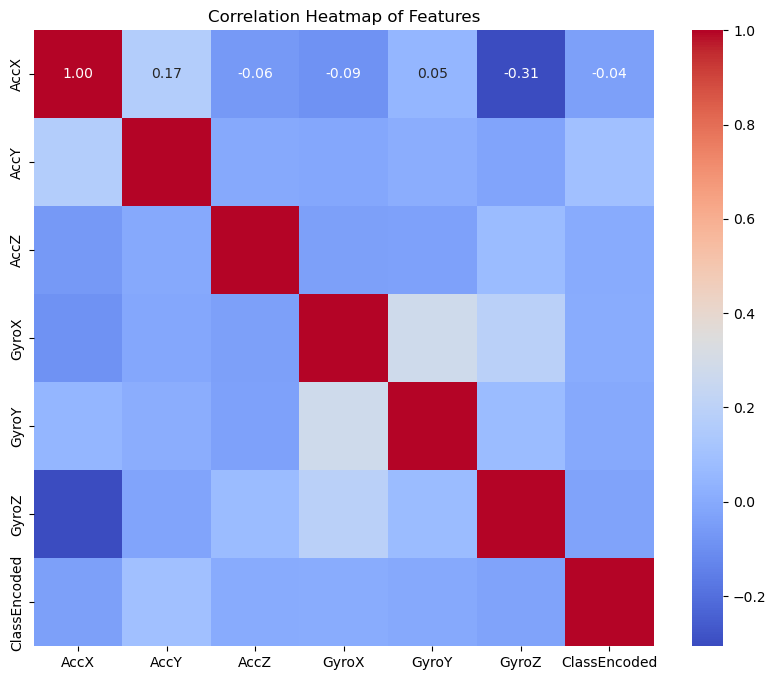

In [7]:
import seaborn as sns

numeric_columns = ['AccX', 'AccY', 'AccZ', 'GyroX', 'GyroY', 'GyroZ']

# Calculate correlations
correlation_matrix = combined_data[numeric_columns + ['ClassEncoded']].corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Features')
plt.show()

In [8]:
from sklearn.preprocessing import StandardScaler

# Columns to standardize
numeric_columns = ['AccX', 'AccY', 'AccZ', 'GyroX', 'GyroY', 'GyroZ']

# Standardize the data
scaler = StandardScaler()
combined_data[numeric_columns] = scaler.fit_transform(combined_data[numeric_columns])

# Check the updated stats
print("After Standardization:")
print(combined_data[numeric_columns].describe())

After Standardization:
               AccX          AccY          AccZ         GyroX         GyroY  \
count  6.728000e+03  6.728000e+03  6.728000e+03  6.728000e+03  6.728000e+03   
mean   8.448784e-18 -4.224392e-18 -1.056098e-17  5.280490e-18 -4.224392e-18   
std    1.000074e+00  1.000074e+00  1.000074e+00  1.000074e+00  1.000074e+00   
min   -5.035326e+00 -8.318533e+00 -7.235229e+00 -1.129242e+01 -1.281714e+01   
25%   -5.612666e-01 -5.588110e-01 -5.496239e-01 -4.281454e-01 -4.092902e-01   
50%   -4.164200e-02  1.417902e-02  3.616546e-03 -1.424654e-02 -9.673580e-03   
75%    5.284209e-01  5.793436e-01  5.431860e-01  4.156594e-01  3.868595e-01   
max    5.924436e+00  4.876146e+00  5.590009e+00  2.228369e+01  1.379128e+01   

              GyroZ  
count  6.728000e+03  
mean  -1.848172e-18  
std    1.000074e+00  
min   -1.086324e+01  
25%   -3.296954e-01  
50%   -6.274525e-02  
75%    2.508047e-01  
max    1.029572e+01  


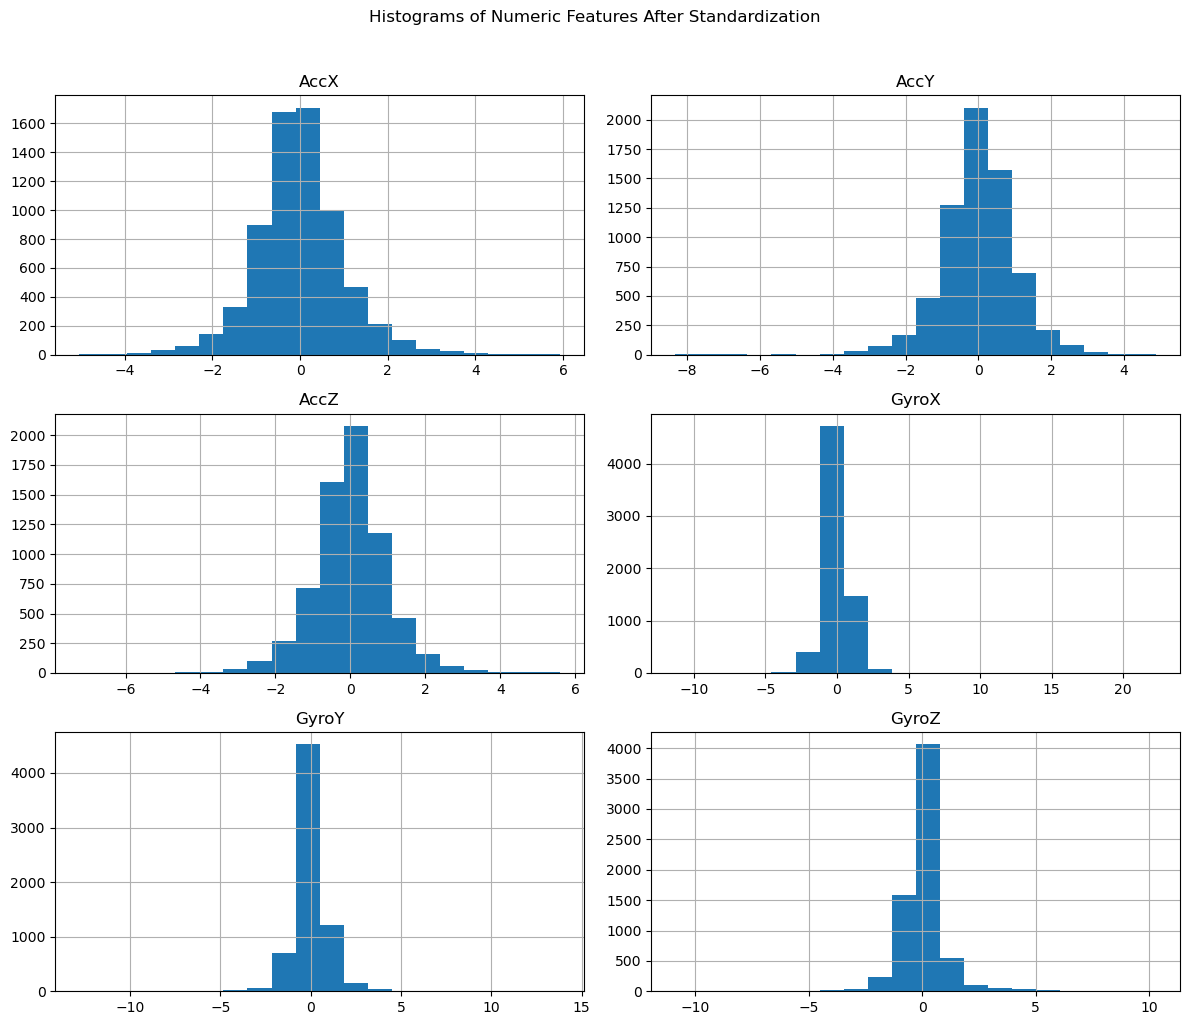

In [9]:
import matplotlib.pyplot as plt

# Plot histograms
combined_data[numeric_columns].hist(figsize=(12, 10), bins=20)
plt.suptitle('Histograms of Numeric Features After Standardization', y=1.02)
plt.tight_layout()
plt.show()

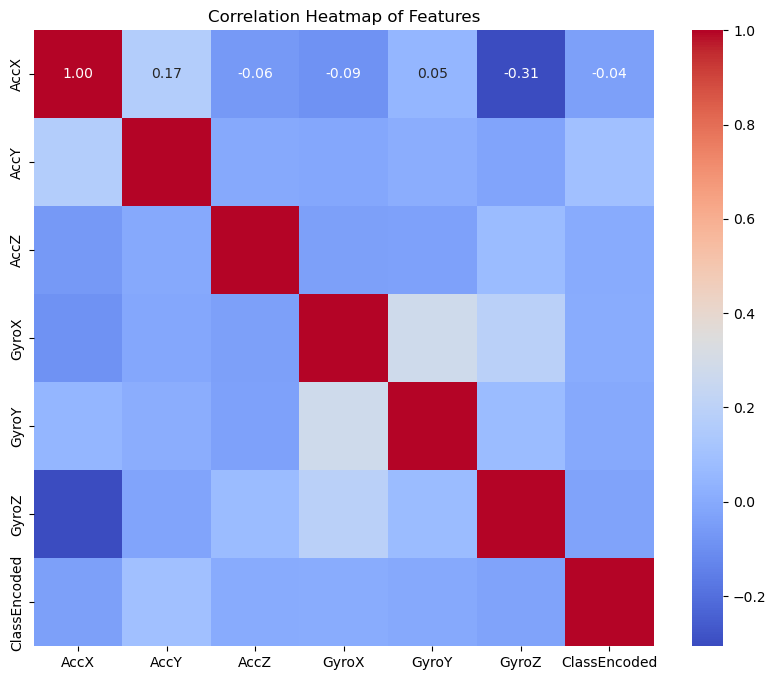

In [10]:
import seaborn as sns

# Calculate correlations
correlation_matrix = combined_data[numeric_columns + ['ClassEncoded']].corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Features')
plt.show()

In [11]:
combined_data['AccMagnitude'] = (combined_data['AccX']**2 + combined_data['AccY']**2 + combined_data['AccZ']**2)**0.5
combined_data['GyroMagnitude'] = (combined_data['GyroX']**2 + combined_data['GyroY']**2 + combined_data['GyroZ']**2)**0.5

In [12]:
print("Final Combined Dataset Preview:")
print(combined_data.head())

Final Combined Dataset Preview:
       AccX      AccY      AccZ     GyroX     GyroY     GyroZ   Class  \
0 -0.072198  0.110790 -0.025344  0.854712 -1.410798  0.805342  NORMAL   
1 -1.733536 -1.086398 -0.231409 -0.462446  0.414611  1.098255  NORMAL   
2 -0.680207 -0.024590  0.197192 -0.325242 -0.236616  0.682851  NORMAL   
3  0.682857 -0.141872  0.648547  1.010210 -0.241550  0.395264  NORMAL   
4  0.031827  0.970745 -0.092689  0.424806 -0.029408  0.395264  NORMAL   

   Timestamp dataset  ClassEncoded  AccMagnitude  GyroMagnitude  
0    3581629   train             2      0.134645       1.835609  
1    3581630   train             2      2.058874       1.261714  
2    3581630   train             2      0.708640       0.792500  
3    3581631   train             2      0.952384       1.111353  
4    3581631   train             2      0.975679       0.580998  


In [13]:
# Correlation of AccMagnitude and GyroMagnitude with ClassEncoded
correlation_with_class = combined_data[['AccMagnitude', 'GyroMagnitude', 'ClassEncoded']].corr()
print("Correlation with ClassEncoded:")
print(correlation_with_class['ClassEncoded'])

Correlation with ClassEncoded:
AccMagnitude    -0.254754
GyroMagnitude   -0.101623
ClassEncoded     1.000000
Name: ClassEncoded, dtype: float64


In [14]:
combined_data

,AccX,AccY,AccZ,GyroX,GyroY,GyroZ,Class,Timestamp,dataset,ClassEncoded,AccMagnitude,GyroMagnitude
0,-0.072198,0.110790,-0.025344,0.854712,-1.410798,0.805342,NORMAL,3581629,train,2,0.134645,1.835609
1,-1.733536,-1.086398,-0.231409,-0.462446,0.414611,1.098255,NORMAL,3581630,train,2,2.058874,1.261714
2,-0.680207,-0.024590,0.197192,-0.325242,-0.236616,0.682851,NORMAL,3581630,train,2,0.708640,0.792500
3,0.682857,-0.141872,0.648547,1.010210,-0.241550,0.395264,NORMAL,3581631,train,2,0.952384,1.111353
4,0.031827,0.970745,-0.092689,0.424806,-0.029408,0.395264,NORMAL,3581631,train,2,0.975679,0.580998
...,...,...,...,...,...,...,...,...,...,...,...,...
6723,-0.802081,-0.611372,-0.190871,-2.248385,-10.575462,4.426144,SLOW,820706,test,3,1.026421,11.682739
6724,1.476054,0.475833,1.004784,19.749995,13.791283,-5.964274,SLOW,820707,test,3,1.847902,24.816010
6725,1.236756,-1.808234,-2.379552,8.700496,5.576942,-4.164191,SLOW,820707,test,3,3.234431,11.141875
6726,0.860593,0.755909,-0.999871,3.495890,4.141282,3.456869,SLOW,820708,test,3,1.520448,6.428173


In [15]:
combined_data_df = pd.DataFrame(combined_data)
combined_data_df = combined_data_df[["AccX", "AccY", "AccZ", "GyroX", "GyroY", "GyroZ", "Timestamp", "GyroMagnitude", "AccMagnitude" ,"ClassEncoded"]]

In [16]:
combined_data_df

,AccX,AccY,AccZ,GyroX,GyroY,GyroZ,Timestamp,GyroMagnitude,AccMagnitude,ClassEncoded
0,-0.072198,0.110790,-0.025344,0.854712,-1.410798,0.805342,3581629,1.835609,0.134645,2
1,-1.733536,-1.086398,-0.231409,-0.462446,0.414611,1.098255,3581630,1.261714,2.058874,2
2,-0.680207,-0.024590,0.197192,-0.325242,-0.236616,0.682851,3581630,0.792500,0.708640,2
3,0.682857,-0.141872,0.648547,1.010210,-0.241550,0.395264,3581631,1.111353,0.952384,2
4,0.031827,0.970745,-0.092689,0.424806,-0.029408,0.395264,3581631,0.580998,0.975679,2
...,...,...,...,...,...,...,...,...,...,...
6723,-0.802081,-0.611372,-0.190871,-2.248385,-10.575462,4.426144,820706,11.682739,1.026421,3
6724,1.476054,0.475833,1.004784,19.749995,13.791283,-5.964274,820707,24.816010,1.847902,3
6725,1.236756,-1.808234,-2.379552,8.700496,5.576942,-4.164191,820707,11.141875,3.234431,3
6726,0.860593,0.755909,-0.999871,3.495890,4.141282,3.456869,820708,6.428173,1.520448,3


In [17]:
shuffled_df = combined_data_df.sample(frac=1, random_state=42).reset_index(drop=True)

In [18]:
shuffled_df

,AccX,AccY,AccZ,GyroX,GyroY,GyroZ,Timestamp,GyroMagnitude,AccMagnitude,ClassEncoded
0,-0.444457,-0.444628,-0.549463,0.760956,-0.081827,-0.042108,819745,0.766500,0.834953,2
1,0.121537,-0.240410,0.861443,0.058929,0.276472,0.352658,3581700,0.451970,0.902581,2
2,0.311207,0.543427,-0.759027,-1.059284,-0.737987,-0.169925,819607,1.302145,0.984014,2
3,-0.946909,0.805519,3.087096,0.916454,-0.141029,2.034910,819617,2.236210,3.328011,2
4,1.103674,-0.445891,0.518754,0.058929,0.128465,-0.339681,3583404,0.367912,1.298469,3
...,...,...,...,...,...,...,...,...,...,...
6723,-1.681967,-0.549674,-1.226643,-0.281794,-0.826791,0.815328,818991,1.194885,2.153093,1
6724,-0.895258,-0.682414,-0.850723,0.358491,-0.328503,-0.052760,819836,0.489095,1.410994,2
6725,0.416610,1.473607,0.480781,-0.611084,0.687805,-0.356324,819855,0.986644,1.605064,2
6726,-0.031760,-0.404605,0.044180,-0.775729,-0.259434,-1.783608,819943,1.962223,0.408247,2


In [19]:
X = shuffled_df.iloc[:, :-1]  # All columns except the last one (features)
y = shuffled_df["ClassEncoded"]  # The last column (target)

In [20]:
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [21]:
# Set up K-Fold Cross-Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

In [22]:

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [23]:
def evaluate_model(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
    recall = recall_score(y_test, y_pred, average='weighted', zero_division=0)
    f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)
    return accuracy, precision, recall, f1

# Initialize models
models = {
    "KNN": KNeighborsClassifier(n_neighbors=2),
    "Random Forest": RandomForestClassifier(n_estimators=1, random_state=42),
    "Decision Tree": DecisionTreeClassifier(criterion="gini", max_depth=4, random_state=42),
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42)
}

KNN - Accuracy: 1.00, Precision: 1.00, Recall: 1.00, F1-Score: 1.00
Random Forest - Accuracy: 0.88, Precision: 0.88, Recall: 0.88, F1-Score: 0.88
Decision Tree - Accuracy: 0.85, Precision: 0.89, Recall: 0.85, F1-Score: 0.84
Logistic Regression - Accuracy: 0.39, Precision: 0.15, Recall: 0.39, F1-Score: 0.22


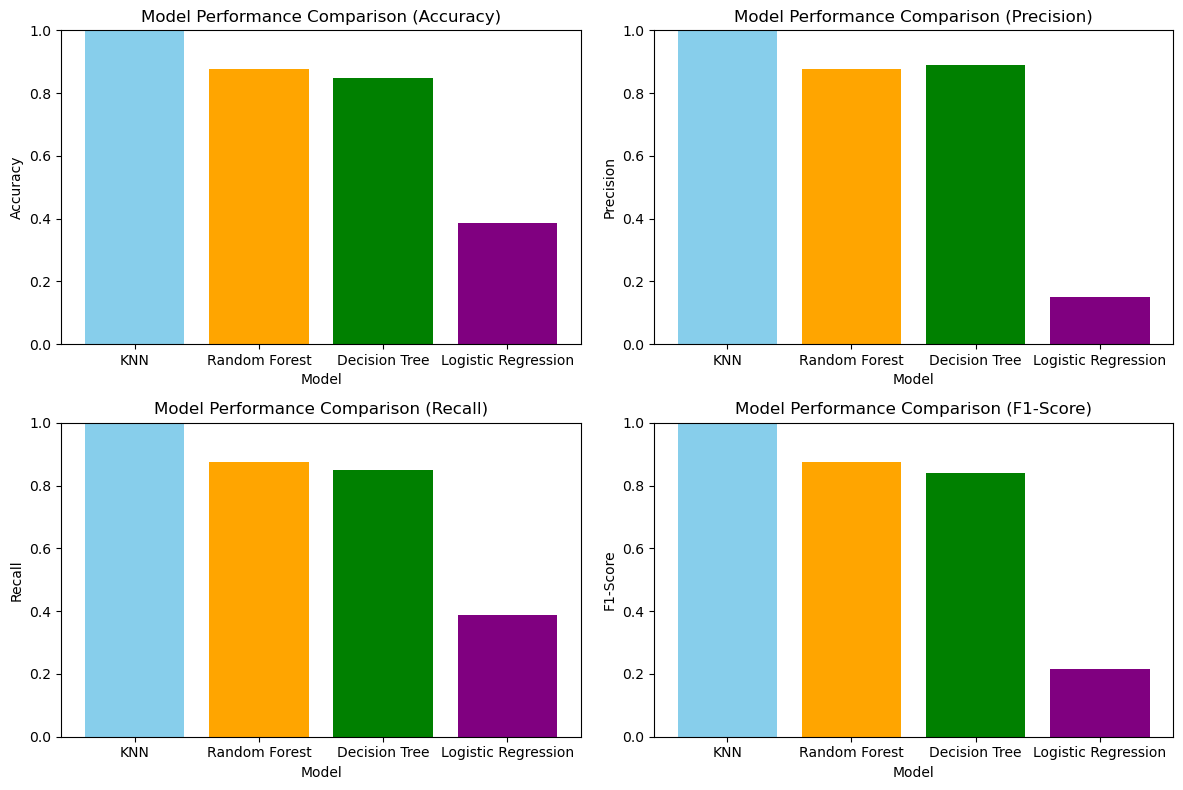

In [24]:
model_scores = {}
for model_name, model in models.items():
    accuracy, precision, recall, f1 = evaluate_model(model, X_train, y_train, X_test, y_test)
    model_scores[model_name] = {
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1-Score": f1
    }
    print(f"{model_name} - Accuracy: {accuracy:.2f}, Precision: {precision:.2f}, Recall: {recall:.2f}, F1-Score: {f1:.2f}")

# Plot the results
plt.figure(figsize=(12, 8))
metrics = ["Accuracy", "Precision", "Recall", "F1-Score"]
for i, metric in enumerate(metrics, 1):
    plt.subplot(2, 2, i)
    plt.bar(model_scores.keys(), [model_scores[model][metric] for model in model_scores], color=['skyblue', 'orange', 'green', 'purple'])
    plt.title(f'Model Performance Comparison ({metric})')
    plt.xlabel('Model')
    plt.ylabel(metric)
    plt.ylim(0, 1)
    plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [ ]:
knn = KNeighborsClassifier(n_neighbors=2)
# knn_model = evaluate_model(knn, X_train, y_train, kf)
knn_model = knn.fit(X_train,y_train)
knn_pred = knn.predict(X_test)
print(f"KNN Test Accuracy: {accuracy_score(y_test, knn_pred) * 100:.2f}%")

KNN Test Accuracy: 100.00%


In [ ]:
rf = RandomForestClassifier(n_estimators=1, random_state=42)
# rf_model = evaluate_model(rf, X_train, y_train, kf)
rf_model = rf.fit(X_train,y_train)
rf_pred = rf.predict(X_test)
print(accuracy_score(y_test, rf_pred))

0.8759286775631501


In [ ]:
nb = GaussianNB()
nb_model = evaluate_model(nb, X_train, y_train, y_test)
# nb.fit(X_train,y_train)
nb_pred = nb_model.predict(X_test)
print(accuracy_score(y_test, nb_pred))

TypeError: evaluate_model() missing 1 required positional argument: 'y_test'

In [ ]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=label_encoder.classes))

cm = confusionmatrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes, yticklabels=labelencoder.classes)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

def evaluate_random_forest(X_train, y_train, X_test, y_test, n_estimators=1, random_state=42):
    rf_model = RandomForestClassifier(n_estimators=n_estimators, random_state=random_state)
    rf_model.fit(X_train, y_train)
    rf_pred = rf_model.predict(X_test)
    
    accuracy = accuracy_score(y_test, rf_pred)
    print(f"Random Forest Model Accuracy: {accuracy:.2f}")
    return accuracy


In [ ]:
accuracy = evaluate_random_forest(X_train, y_train, X_test, y_test, n_estimators=1, random_state=42)